<a href="https://colab.research.google.com/github/Anuj-1996/Bayesian-Neural-Network-/blob/main/BNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


A **Bayesian neural network** is a type of neural network that is trained using Bayesian inference. 
This means that instead of just learning the weights and biases of the network based 
on a training dataset, the network also learns a distribution over those weights and biases.

In a traditional neural network, the weights and biases are typically chosen to minimize the 
error between the predicted output of the network and the true output on the training dataset. 
This is done using an optimization algorithm, such as gradient descent. 

However, in a Bayesian neural network, the weights and biases are treated as random variables, and a probability distribution is learned over them. 
This distribution reflects the uncertainty of the network about the optimal weights and biases for the given task.

One advantage of using a Bayesian neural network is that it can provide uncertainty estimates for its predictions. 
This can be useful in applications where the uncertainty of the prediction is important, such as in medical diagnosis or self-driving cars.

Overall, Bayesian neural networks offer a different approach to training neural networks that can be useful in certain situations where traditional 
neural networks may not be ideal.


In this, I have used the ***DenseReparameterization*** layer from the TensorFlow Probability (TFP) library to implement a fully-connected BNN. 
I have used the negative log likelihood loss function for the likelihood and the Kullback-Leibler divergence loss function for the prior, and optimize the sum of these two losses using the Adam optimizer.
Finally, I evaluate the accuracy of the model on the training and test sets.

In [ ]:
#import the TensorFlow library 
import tensorflow as tf

#import the TensorFlow Probability (TFP) library
import tensorflow_probability as tfp 

Create an input placeholder x of type float32 and shape [None, 28, 28, 1] for the input data,which means that it will hold an arbitrary number of 28x28x1 images


In [ ]:
# Input and output placeholders
x = tf.placeholder(tf.float32, shape=[None, 28, 28, 1])

#create an output placeholder y of type int64 and shape [None] for the labels
y = tf.placeholder(tf.int64, shape=[None])

The BNN model is a fully-connected layer created using the DenseReparameterization layer from the TFP library.
This layer has units=10 output units and uses the default multivariate normal distribution for the kernel (weights) and bias priors. 


In [ ]:
# Bayesian neural network model
model = tfp.layers.DenseReparameterization(units=10,
                                            kernel_prior_fn=tfp.layers.default_multivariate_normal_fn,
                                            bias_prior_fn=tfp.layers.default_multivariate_normal_fn)
                                            
#The model will compute the logits for each class using the input data x.
logits = model(x)


The loss function for the BNN is the negative log likelihood loss for the likelihood and the Kullback-Leibler divergence loss for the prior. 
The sum of these two losses is called the evidence lower bound (ELBO) loss. 
The ELBO loss is minimized using the Adam optimizer.

In [ ]:
# Loss function and optimization
neg_log_likelihood = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
kl = sum(model.losses)
elbo_loss = neg_log_likelihood + kl
optimizer = tf.train.AdamOptimizer().minimize(elbo_loss)


The evaluation metric is the mean accuracy, which is calculated by comparing the predicted class (given by the logits and the argmax function) with the true class (given by y).


In [ ]:
# Evaluation metric
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(logits, axis=1), y), tf.float32))

The training loop iterates over 10 epochs and in each epoch, it processes the training data in batch-sized chunks. For each batch, it runs the optimizer to minimize the ELBO loss using the Adam optimizer. After processing all the batches, it calculates the mean accuracy on the training and test data and prints the results. The training and test data are passed to the model through placeholders x and y.

In [ ]:
# Training loop
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(10):
        for i in range(len(X_train)//batch_size):
            X_batch = X_train[i*batch_size:(i+1)*batch_size]
            y_batch = y_train[i*batch_size:(i+1)*batch_size]
            sess.run(optimizer, feed_dict={x: X_batch, y: y_batch})
        train_acc = sess.run(accuracy, feed_dict={x: X_train, y: y_train})
        test_acc = sess.run(accuracy, feed_dict={x: X_test, y: y_test})
        print(f'Epoch {epoch}: train_acc={train_acc}, test_acc={test_acc}')


Additional Information:

Kullback-Leibler (KL) divergence, also known as relative entropy, is a measure of the difference between two probability distributions. It is a non-symmetric measure, meaning that the KL divergence between distribution A and B is not necessarily the same as the KL divergence between distribution B and A.

In the context of machine learning, KL divergence is often used as a measure of the difference between the distribution of the model's weights (the posterior distribution) and the distribution of the weights specified by the prior. The KL divergence loss is then used as a regularization term in the loss function, encouraging the posterior distribution to be similar to the prior distribution.

KL divergence is defined as:

> KL(p || q) = ∑p(x)log(p(x)/q(x))




where p and q are the two probability distributions being compared. The KL divergence is always non-negative and is equal to zero if and only if p and q are equal.

In TensorFlow, KL divergence can be calculated using the tfp.distributions.kl_divergence function.

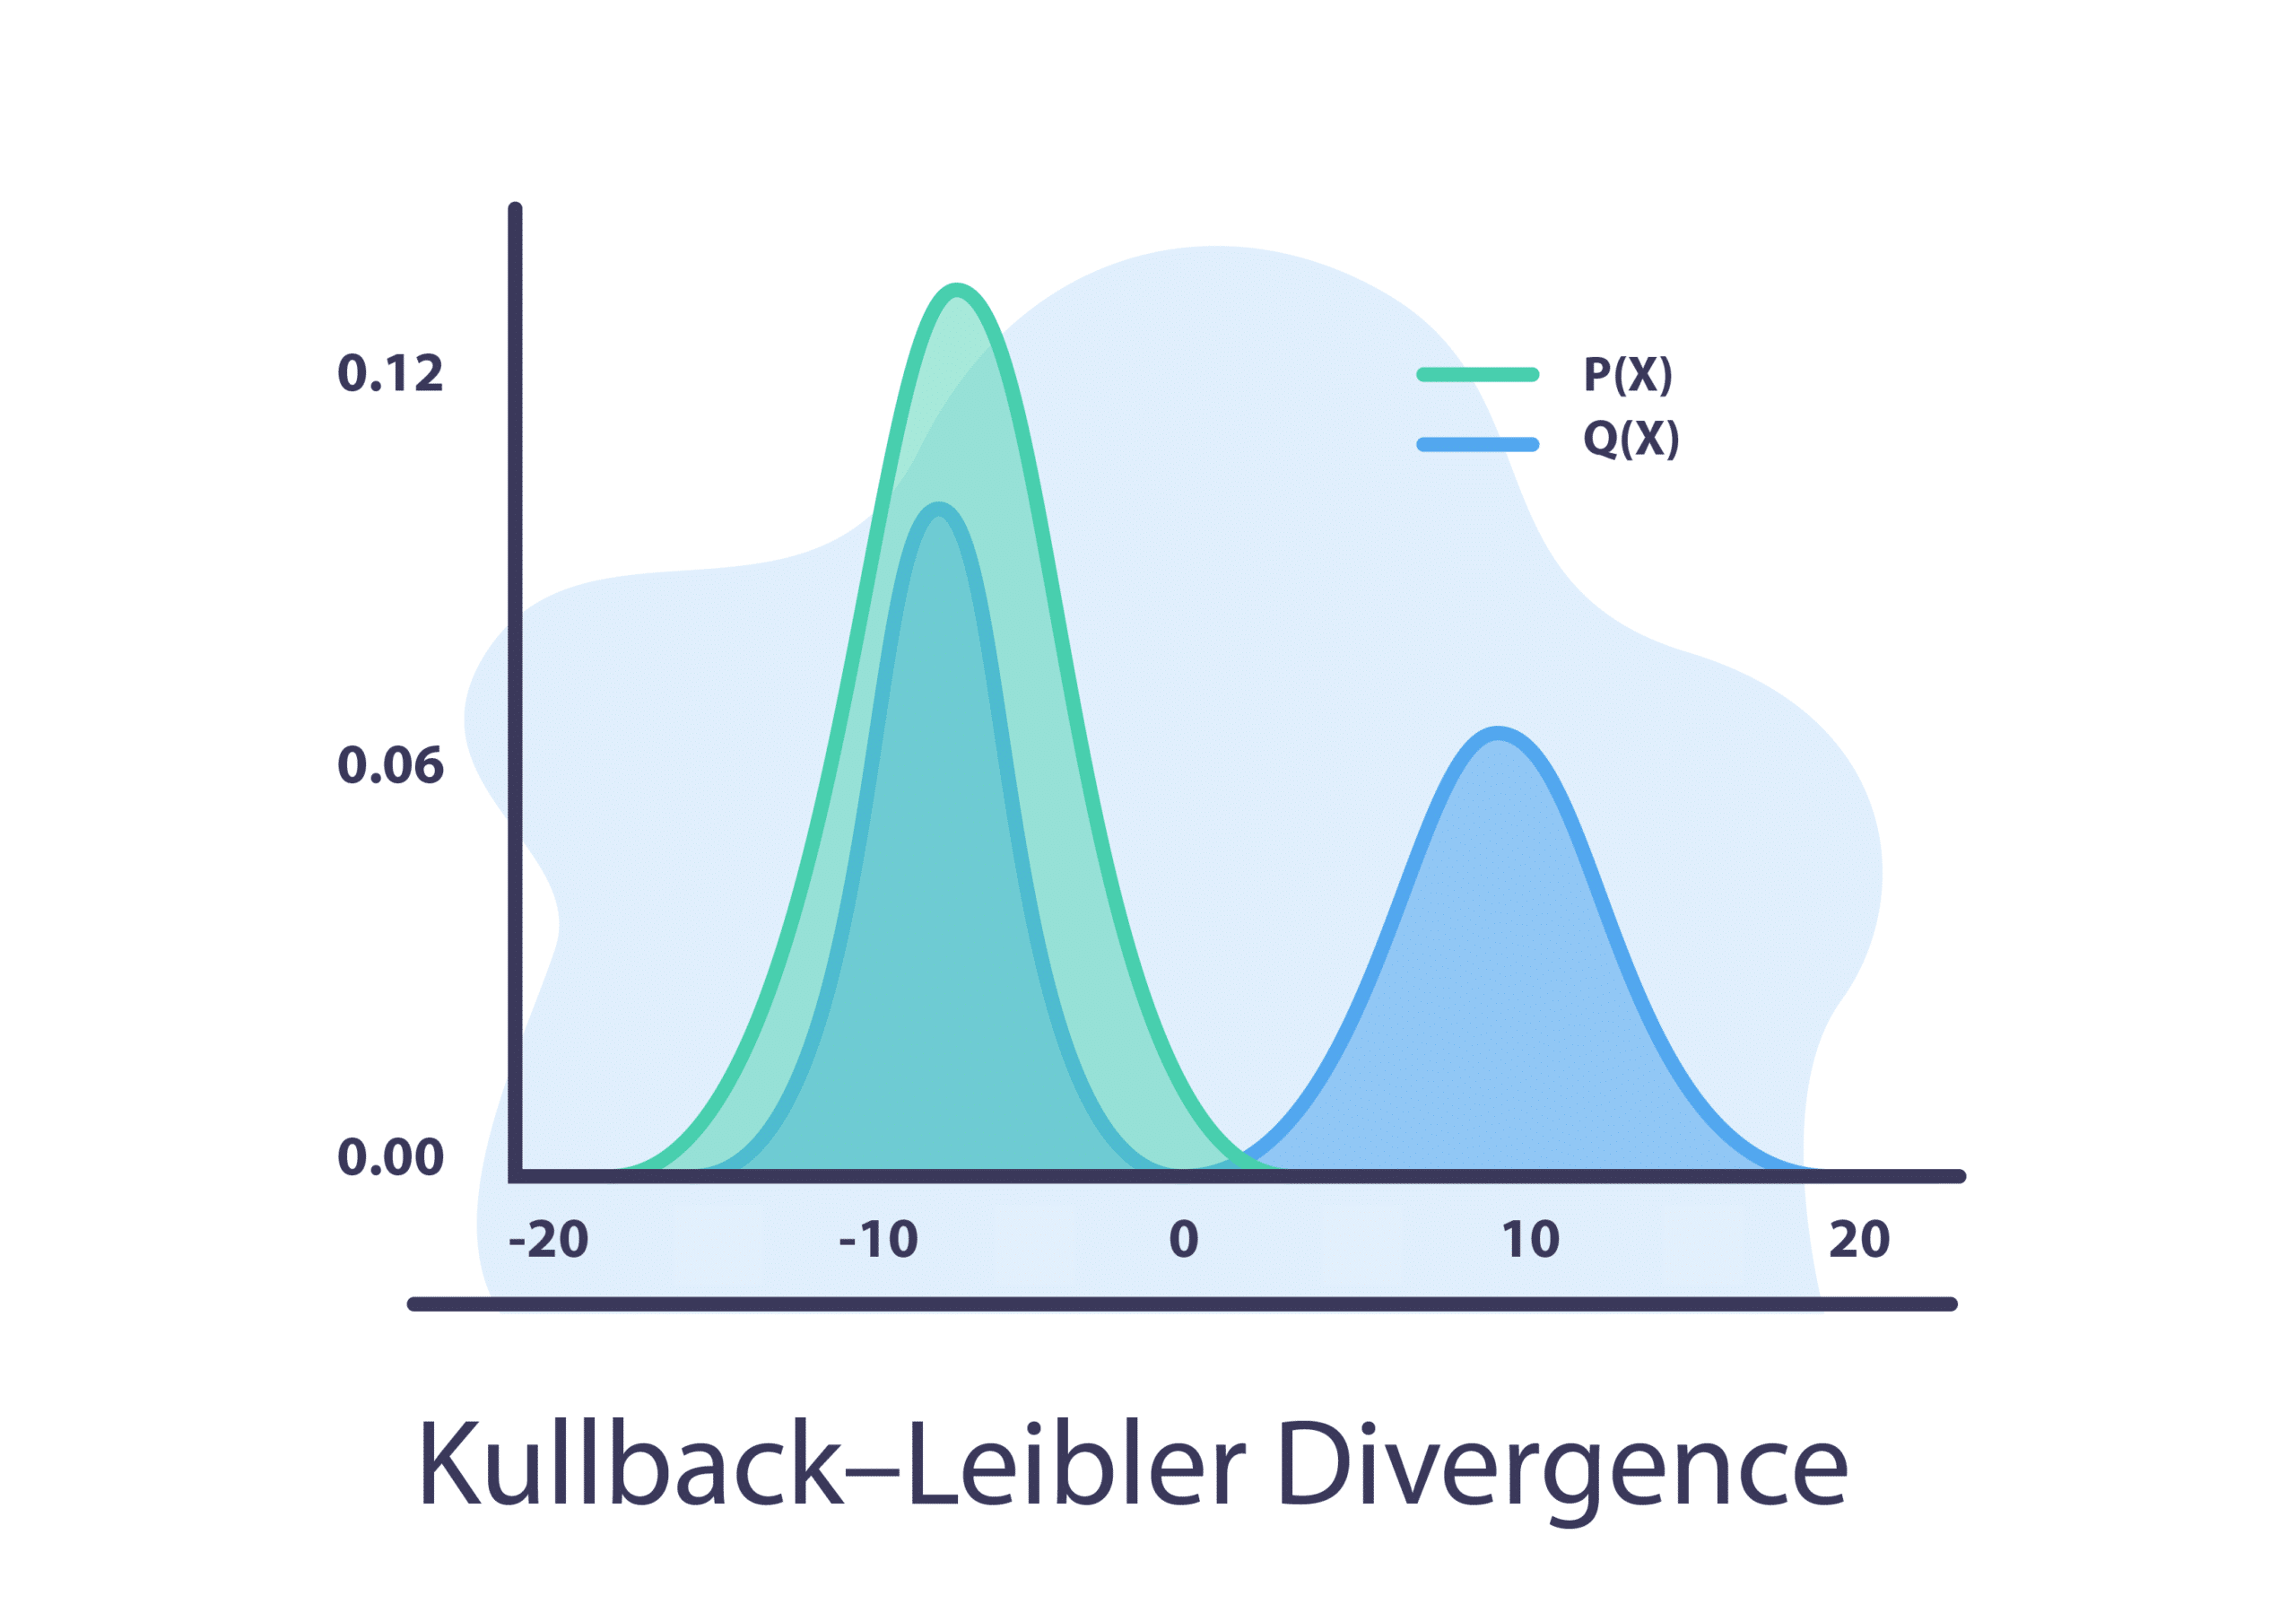